In [108]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from scipy import ndimage
from collections import deque
from scipy import signal as sg

def obterSemente(image):
    # Sabemos que a pílula está sempre no centro da imagem
    # A semente será um retângulo no centro
    w, h = image.shape
    p = 10. # p é uma porcentagem da altura e da largura
    
    pos_ini_x_mrk = int(w/2 - p*w/100.)
    pos_ini_y_mrk = int(h/2 - p*h/100.)
    pos_fim_x_mrk = int(w/2 + p*w/100.)
    pos_fim_y_mrk = int(h/2 + p*h/100.)

    # Semente é uma imagem do mesmo tamanho que img, contendo zeros
    semente = np.zeros(shape=(w,h), dtype=np.uint8)
    # acrescenta um retângulo central de pixels = 255
    semente[pos_ini_x_mrk:pos_fim_x_mrk, pos_ini_y_mrk:pos_fim_y_mrk] = 255
    
    return semente

def vizinhos(x, y, w, h):
    lista = deque()
    
    pontos = [(x-1,y), (x+1, y), (x,y-1), (x,y+1),
              (x-1,y+1), (x+1, y+1), (x-1,y-1), (x+1,y-1),
             ]
    for p in pontos:
        if (p[0]>=0 and p[1]>=0 and p[0]<w and p[1]<h):
            lista.append((p[0], p[1]))
            
    return lista
    
def crescerRegiao(image, reg, epsilon=5):
    w, h = image.shape
    
    fila = deque()
    for x in range(w):
        for y in range(h):
            if reg[x,y]==255:
                fila.append((x,y))
       
    while fila:
        ponto = fila.popleft()
        x = ponto[0]
        y = ponto[1]

        v_list = vizinhos(x, y, w, h)
        for v in v_list:
            v_x = v[0]
            v_y = v[1]
            if( (reg[v_x][v_y]!=255) and (abs(image[x][y]-image[v_x][v_y])<epsilon)):
                reg[v_x][v_y] = 255
                fila.append((v_x,v_y))
        
    print(entrou)
    return reg
                
def plots(p1, p2):
    fig = plt.figure(figsize=(9,3), dpi=80)
    a = fig.add_subplot(1,3,1)
    a.axis('off')
    plt.imshow(p1, cmap=plt.cm.gray)
    a.set_title('Original')

    a = fig.add_subplot(1,3,2)
    a.axis('off')
    plt.imshow(p2, cmap=plt.cm.gray)
    a.set_title('Cresc.Região')

    a = fig.add_subplot(1,3,3)
    a.axis('off')
    plt.imshow(p1, cmap=plt.cm.gray)
    plt.imshow(p2, alpha=0.5)
    a.set_title('Cresc.Região')

    plt.show()



1600
10121


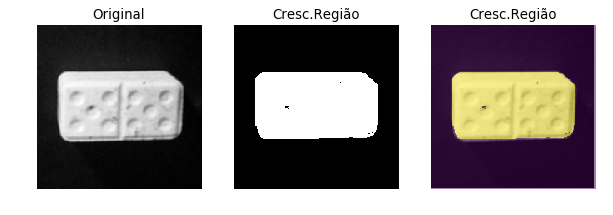

In [111]:
# Leitura Imagem
img1 = imread('Limiarizacao/3303_lg.tiff', as_grey=True)
img1 = (img1 * 255).round().astype(np.uint8)

semente = obterSemente(img1)

media3 = [[1./9., 1./9., 1./9.], 
          [1./9., 1./9., 1./9.], 
          [1./9., 1./9., 1./9.]]

c_media = sg.convolve(img1, media3, "valid")


regiao = crescerRegiao(c_media, semente, epsilon=10)

plots(c_media, regiao)